In [1]:
!pip install opencv-python
!pip install deepface
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=fdf9099a814a64c0d42b19395df569c6f9bb0f51d2e1f0eaf9141120841b8699
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


Action: race: 100%|██████████| 2/2 [00:00<00:00, 38.78it/s]


Dominant Emotion: happy
Dominant Race: black


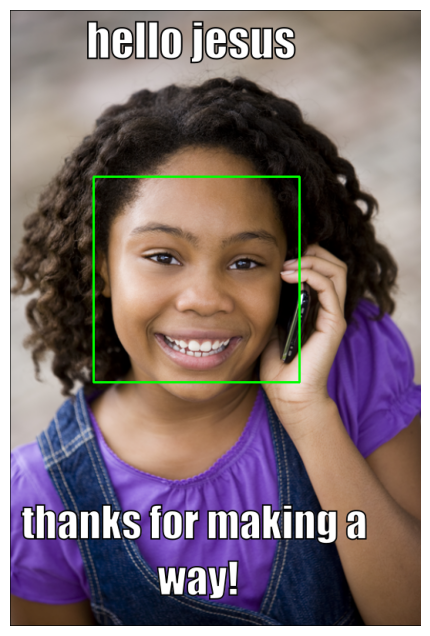

In [20]:
# Importing the libraries
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# Load the image
file = "/content/01392.png"
image = cv2.imread(file)  # Single image
trained_face_data = cv2.CascadeClassifier(r'/content/haarcascade_frontalface_default.xml')

# Analyze the image for emotion and race
predictions = DeepFace.analyze(image, actions=['emotion', 'race'])

# Since predictions may return a list, access the first element if necessary
if isinstance(predictions, list):
    predictions = predictions[0]  # Access first prediction if it's a list

# Print only the dominant emotion and race
print("Dominant Emotion:", predictions['dominant_emotion'])
print("Dominant Race:", predictions['dominant_race'])

# Detect faces in the image
grayscaled_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)

# Draw bounding box around each detected face
for (x, y, w, h) in face_coordinates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the image with bounding box
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
